In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def barplot(df, title="Results", \
            xlab='Data', metric="UAR", \
            ylim_low=.4, ylim_up=1, bar_width = 0.12, \
            fontsize=10):
    """A bar plot for 2 dimensional results: e.g. models vs. features
    
    """
    colors = ['tab:red',
              'tab:blue',
              'tab:orange',
              'tab:green',
              'tab:purple',
              'tab:cyan',
              'tab:brown',
              'tab:olive',
              'tab:pink',
              ]
    bar_width = bar_width

    fig, ax = plt.subplots(figsize=(12, 8))
    br = []
    br.append(np.arange(df.shape[1]))
    for m in range(df.shape[0]):
        br.append([x + bar_width for x in br[-1]])

    for im in range(df.shape[0]):
        bars = plt.bar(br[im],
                       df.iloc[im],
                       color=colors[im],
                       width=bar_width,
                       edgecolor='k',
                       label=df.index[im])
        # Add labels to the bars
        for bar, value in zip(bars, df.iloc[im]):
            value = f'.{(int)(100*value)}'
            plt.text(bar.get_x() + bar.get_width() / 2,
                     bar.get_height() + 0.01,
                     f'{value}',  # Format the value to 2 decimal places
                     ha='center',
                     va='bottom',
                     fontsize=fontsize)

    plt.xlabel(xlab, fontweight='bold', fontsize=15)
    plt.ylabel(metric, fontweight='bold', fontsize=15)
    plt.xticks([r + (df.shape[0]-1)//2*bar_width for r in range(df.shape[1])],
               df.columns,
               fontsize=15)
    plt.title(title.upper(), fontweight='bold', fontsize=15)
    plt.grid()
    plt.legend(fontsize=14)
    plt.ylim([ylim_low, ylim_up])
    plt.tight_layout()

In [ ]:
# hacky code to collect the results from storage

feats = [
    "os",
    "praat",
    "audmodel",
    "hubert-large-ll60k",
    "trill",
    "whisper-medium",
    "wavlm-large",
    "wav2vec2",
]
#result_key = "dev"
result_key = "test"

models = ["mlp","xgb","svm"]
result_arrays = {}
for m in models:
    result_arrays[m] = []
for f in feats:
    for m in models:
        if result_key == "dev":
            if m == "mlp":
                fn = f"results/results/run_0/train_dev_{m}_{f}_16-64_C_val-10_drop-3_scale-standard_conf.txt"
            else:
                fn = f"results/results/run_0/train_dev_{m}_{f}_C_val-10_drop-3_scale-standard_conf.txt"
        elif result_key == "test":
            if m == "mlp":
                fn = f"results/results/run_0/train_dev_{m}_{f}_16-64_C_val-10_drop-3_scale-standard_test-test_conf.txt"
            else:
                fn = f"results/results/run_0/train_dev_{m}_{f}_C_val-10_drop-3_scale-standard_test-test_conf.txt"
        file_in = open(fn, "r")
        line = file_in.read()
        y = line.split("\n")[0].split(" ")[3].replace(",", "")
        e = line.split("\n")[0].split(" ")[4]
        y = int(float(y) * 1000) / 1000.0
        print(f, y, e)
        result_arrays[m].append(y)

In [ ]:
# make a dataframe from the results
db_df = pd.DataFrame(result_arrays, index = feats)
db_df['mean'] = db_df.mean(numeric_only=True, axis=1)
db_df

In [ ]:
# ... and plot it
barplot(db_df,title = f'results {result_key}',ylim_low =.25, ylim_up=0.8, bar_width=.1, fontsize=15)

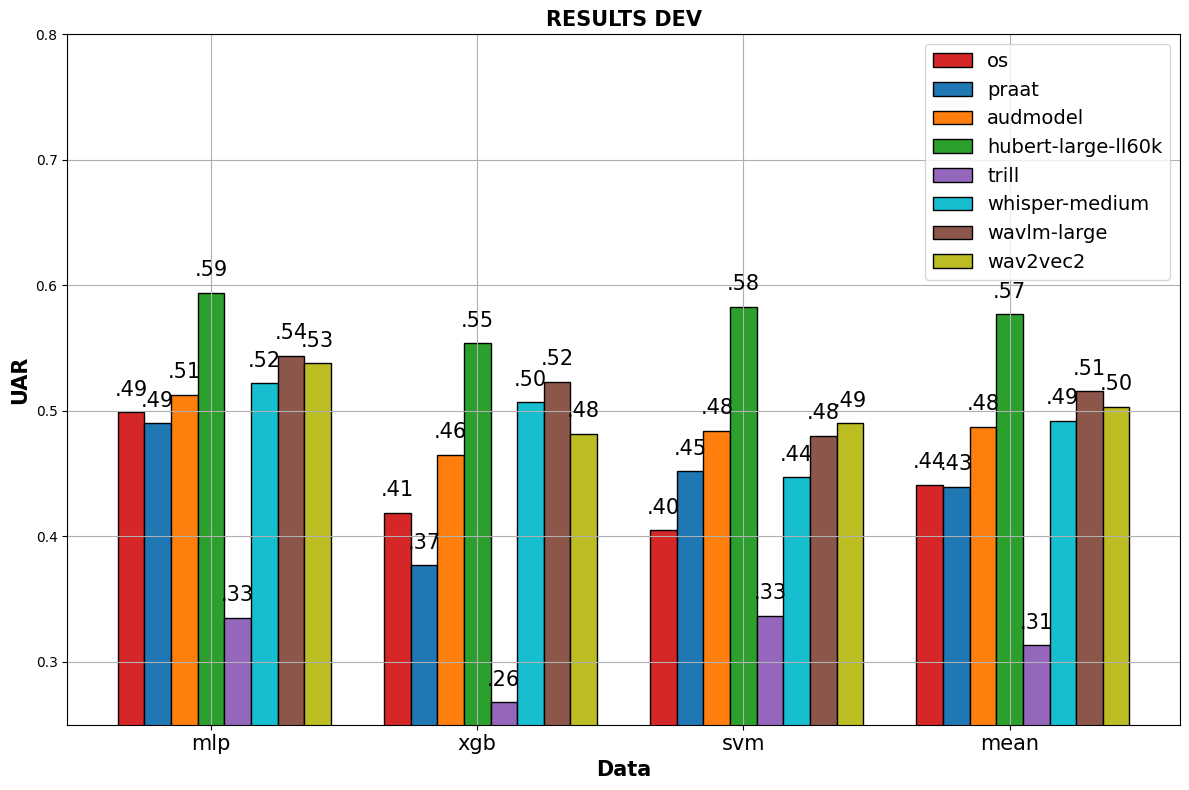

In [2]:
# should look like this:
from IPython.display import Image
Image(filename='../../images/results_dev.png') 